In [2]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.DataFrame()
filenames = glob("DataGovSG/*_rainfall.csv")
for filename in filenames:
    other_df = pd.read_csv(filename)
    other_df = other_df.rename(columns={"value": "rainfall"})
    other_df["timestamp_sgt"] = other_df["timestamp_sgt"].astype("datetime64[ns]")
    df = df.append(other_df,ignore_index=True)
another_df = df.set_index("station_id").sort_index()

In [10]:
non_zero = another_df[another_df["rainfall"]>0]
non_zero = non_zero.sort_values("timestamp_sgt",ascending=True).reset_index().set_index("timestamp_sgt",drop=False)
times = non_zero.index
non_zero = non_zero.set_index([times.hour])
non_zero.index.names = ["hour"]
non_zero

,station_id,rainfall,timestamp_sgt
hour,,,
1,S90,0.2,2016-12-03 01:04:59
1,S07,0.8,2016-12-03 01:04:59
1,S07,0.2,2016-12-03 01:09:59
1,S71,0.2,2016-12-03 01:09:59
1,S88,0.2,2016-12-03 01:14:59
1,S07,1.0,2016-12-03 01:14:59
1,S88,1.2,2016-12-03 01:19:59
1,S79,0.4,2016-12-03 01:24:59
1,S119,0.4,2016-12-03 01:24:59


In [19]:
non_zero = non_zero.groupby(["hour","station_id"]).mean()
non_zero

rainfall
hour station_id          
0    S06         0.953846
     S07         0.592857
     S08         0.820690
     S100        0.389474
     S101        0.437500
     S102        0.227586
     S104        0.255556
     S106        0.425000
     S107        1.446154
     S108        0.666667
     S109        0.675000
     S11         0.238095
     S110        1.080000
     S112        0.233333
     S113        2.047619
     S114        0.237500
     S115        0.200000
     S116        0.250000
     S117        0.283333
     S118        0.904762
     S119        1.193750
     S120        0.678571
     S121        0.271429
     S122        0.522222
     S123        1.041667
     S24         0.757895
     S29         0.354545
     S33         0.228571
     S35         0.450000
     S36         0.819048
...                   ...
23   S29         0.200000
     S33         0.666667
     S35         0.762162
     S36         0.226087
     S40         0.260870
     S43         0.230000
     S44         0.223077
     S46         0.296296
     S50         0.522222
     S55         0.242857
     S60         0.314286
     S61         0.233333
     S63         0.231250
     S64         0.246154
     S66         0.262069
     S69         0.550000
     S71         0.350000
     S77         0.353333
     S78         0.266667
     S79         0.306667
     S81         0.216667
     S84         0.240000
     S88         0.278261
     S89         0.723810
     S90         0.288889
     S900        0.275000
     S91         0.323077
     S92         0.337500
     S94         0.222222
     S96         0.200000

[1340 rows x 1 columns]

In [ ]:
locations = pd.read_csv("StationLocations.csv")
locations=locations.rename(columns={"Lon (d)":"longitude","Lat (d)":"latitude"})
locations

In [20]:
non_zero = non_zero.reset_index()
inner_df = pd.merge(non_zero,locations,how="left",on="station_id")

In [14]:
inner_df = inner_df.set_index(["hour"],drop=True)
inner_df

,station_id,rainfall,longitude,latitude
hour,,,,
0,S06,0.953846,103.90070,1.35240
0,S07,0.592857,103.83340,1.34150
0,S08,0.820690,103.82710,1.37010
0,S100,0.389474,103.74855,1.41720
0,S101,0.437500,103.71340,1.35053
0,S102,0.227586,103.76800,1.18900
0,S104,0.255556,103.78538,1.44387
0,S106,0.425000,103.96730,1.41680
0,S107,1.446154,103.96250,1.31350


In [15]:
indices = inner_df.index.unique().values

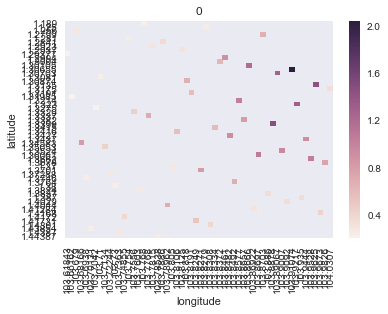

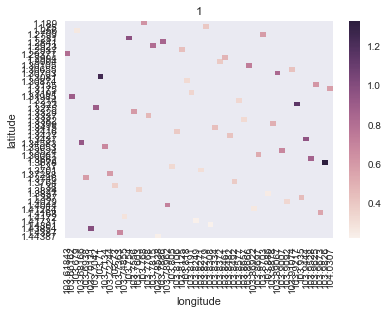

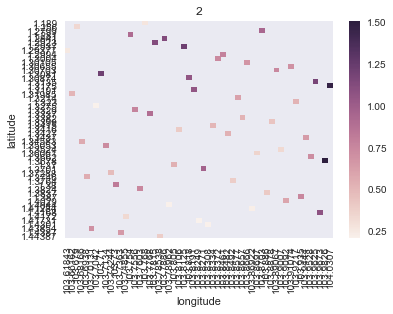

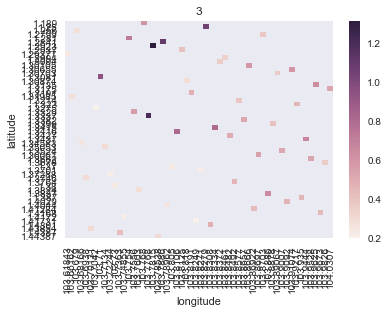

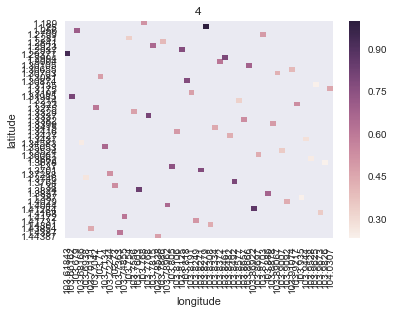

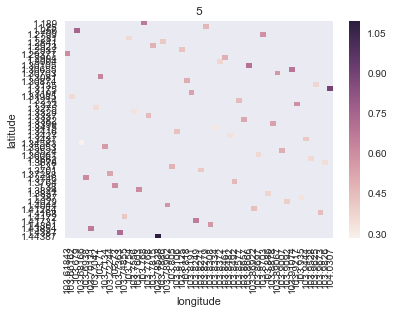

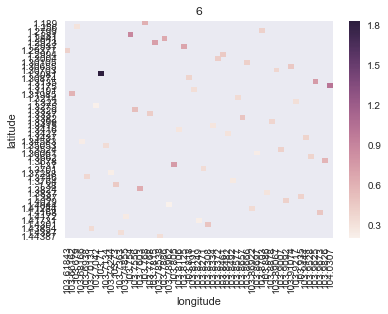

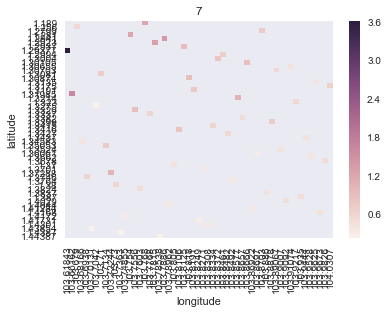

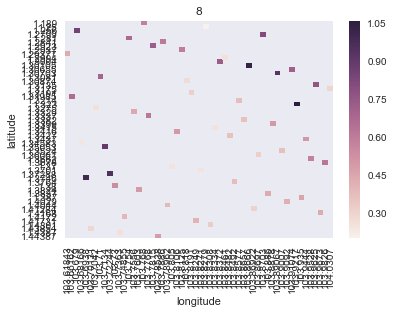

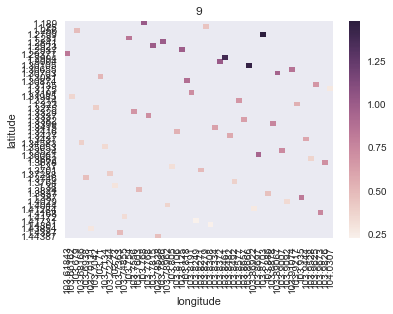

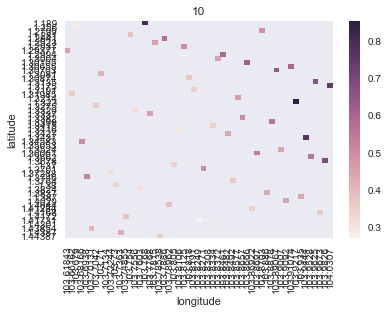

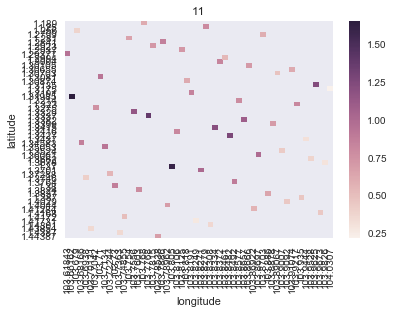

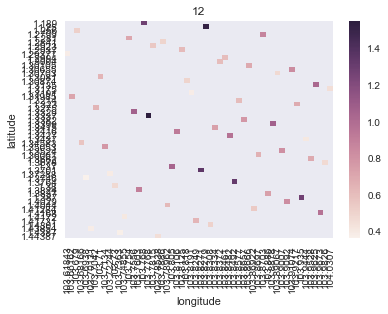

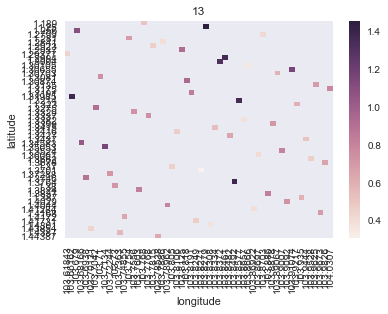

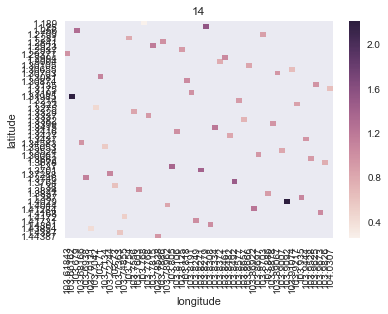

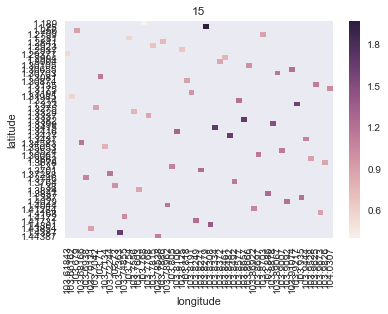

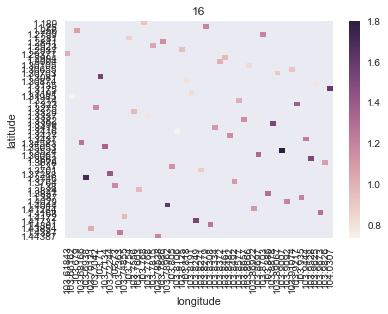

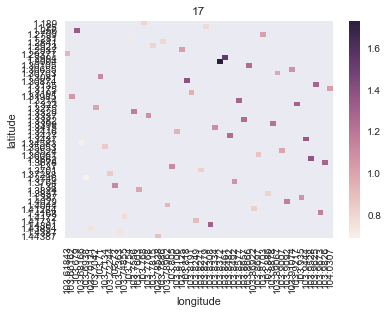

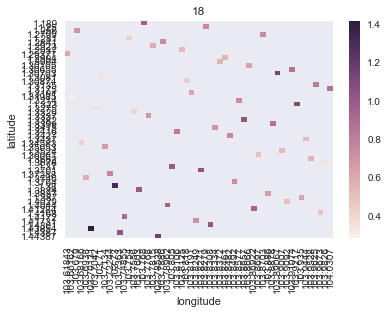

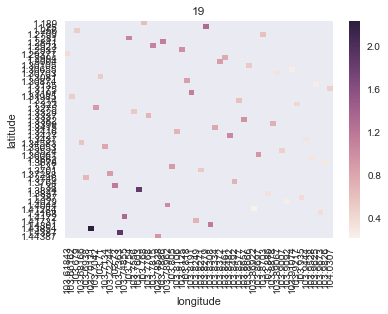

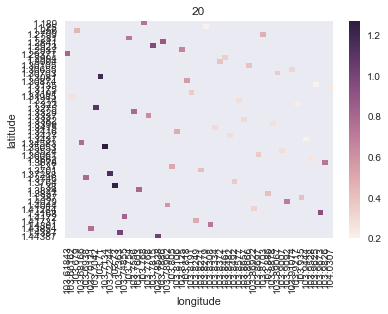

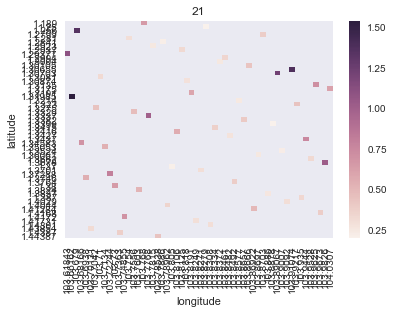

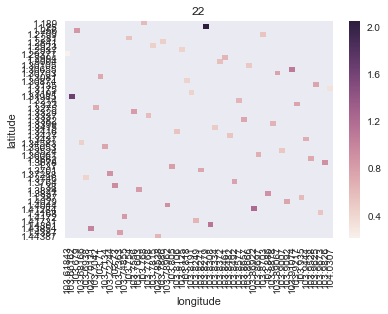

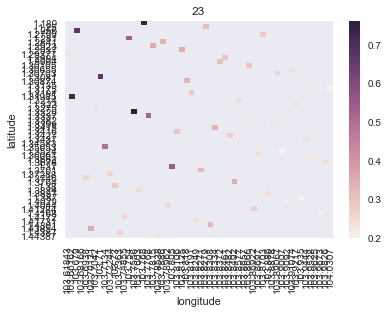

In [16]:
#Average total rainfall by station for each hour in a day (shows precipitation intensity)
for index in indices:
    new_df = inner_df.loc[index]
    new_df.set_index("station_id",inplace=True,drop=True)
    new_df = new_df.reset_index(drop=True)
    new_df = new_df.pivot(index="latitude",columns="longitude",values="rainfall")
    #print(new_df.head())
    ax=plt.axes()
    sns.heatmap(new_df,ax=ax)
    ax.set_title(index)
    plt.show()

In [6]:
pd.Timedelta("1 hours")

Timedelta('0 days 01:00:00')

In [5]:
nnon_zero = another_df[another_df["rainfall"]>0]
nnon_zero = nnon_zero.sort_values("timestamp_sgt",ascending=True).reset_index().set_index("timestamp_sgt",drop=False)
times = nnon_zero.index
nnon_zero = nnon_zero.set_index([times.year,times.month,times.day,times.hour])
nnon_zero.index.names = ["year","month","day","hour"]
#non_zero
number = nnon_zero.groupby(["year","month","day","hour"])["station_id"].nunique()
number=number[number==1]
one_station = list(number.index)
#print(one_station)
non_zero = another_df.sort_values("timestamp_sgt",ascending=True).reset_index().set_index("timestamp_sgt",drop=False)
times = non_zero.index
non_zero = non_zero.set_index([times.year,times.month,times.day,times.hour])
non_zero.index.names = ["year","month","day","hour"]
#print(non_zero.iloc[0])
for stat in one_station:
    non_zero.loc[stat,"rainfall"] = 0
non_zero.head()

station_id  rainfall       timestamp_sgt
year month day hour                                         
2016 12    2   21         S121       0.0 2016-12-02 21:49:59
               21         S109       0.0 2016-12-02 21:49:59
               21          S08       0.0 2016-12-02 21:49:59
               21         S120       0.0 2016-12-02 21:49:59
               21          S11       0.0 2016-12-02 21:49:59

In [6]:
non_zero = non_zero.groupby(["year","month","day","hour","station_id"]).sum()
non_zero

rainfall
year month day hour station_id          
2016 12    2   21   S06              0.0
                    S07              0.0
                    S08              0.0
                    S100             0.0
                    S101             0.0
                    S102             0.0
                    S104             0.0
                    S107             0.0
                    S108             0.0
                    S109             0.0
                    S11              0.0
                    S110             0.0
                    S112             0.0
                    S113             0.0
                    S114             0.0
                    S115             0.0
                    S116             0.0
                    S117             0.0
                    S118             0.0
                    S119             0.0
                    S120             0.0
                    S121             0.0
                    S122             0.0
                    S123             0.0
                    S24              0.0
                    S24B             0.0
                    S29              0.0
                    S33              0.0
                    S35              0.0
                    S36              0.0
...                                  ...
2017 4     30  23   S118             0.0
                    S119             0.0
                    S120             0.0
                    S122             0.0
                    S123             0.0
                    S24              0.0
                    S29              0.0
                    S33              0.0
                    S35              0.0
                    S40              0.0
                    S43              0.0
                    S44              0.0
                    S46              0.0
                    S50              0.0
                    S55              0.0
                    S61              0.0
                    S63              0.0
                    S64              0.0
                    S66              0.0
                    S71              0.0
                    S77              0.0
                    S78              0.0
                    S79              0.0
                    S81              0.0
                    S84              0.0
                    S88              0.0
                    S89              0.0
                    S900             0.0
                    S92              0.0
                    S94              0.0

[193157 rows x 1 columns]

In [7]:
non_zero = non_zero.reset_index()
inner_df = pd.merge(non_zero,locations,how="left",on="station_id")

In [8]:
inner_df = inner_df.set_index(["year","month","day","hour"],drop=True)
inner_df

station_id  rainfall  longitude  latitude
year month day hour                                          
2016 12    2   21          S06       0.0  103.90070   1.35240
               21          S07       0.0  103.83340   1.34150
               21          S08       0.0  103.82710   1.37010
               21         S100       0.0  103.74855   1.41720
               21         S101       0.0  103.71340   1.35053
               21         S102       0.0  103.76800   1.18900
               21         S104       0.0  103.78538   1.44387
               21         S107       0.0  103.96250   1.31350
               21         S108       0.0  103.87030   1.27990
               21         S109       0.0  103.84920   1.37640
               21          S11       0.0  103.69380   1.37460
               21         S110       0.0  103.86970   1.36061
               21         S112       0.0  103.70131   1.43854
               21         S113       0.0  103.91074   1.30655
               21         S114       0.0  103.73000   1.38000
               21         S115       0.0  103.61843   1.29377
               21         S116       0.0  103.75400   1.28100
               21         S117       0.0  103.67900   1.25600
               21         S118       0.0  103.84610   1.29940
               21         S119       0.0  103.86660   1.30105
               21         S120       0.0  103.81800   1.30874
               21         S121       0.0  103.72244   1.37288
               21         S122       0.0  103.82490   1.41731
               21         S123       0.0  103.85770   1.32140
               21          S24       0.0  103.98260   1.36780
               21         S24B       0.0        NaN       NaN
               21          S29       0.0  103.93500   1.38700
               21          S33       0.0  103.71000   1.30810
               21          S35       0.0  103.75560   1.33290
               21          S36       0.0  103.86570   1.33820
...                        ...       ...        ...       ...
2017 4     30  23         S118       0.0  103.84610   1.29940
               23         S119       0.0  103.86660   1.30105
               23         S120       0.0  103.81800   1.30874
               23         S122       0.0  103.82490   1.41731
               23         S123       0.0  103.85770   1.32140
               23          S24       0.0  103.98260   1.36780
               23          S29       0.0  103.93500   1.38700
               23          S33       0.0  103.71000   1.30810
               23          S35       0.0  103.75560   1.33290
               23          S40       0.0  103.78962   1.40440
               23          S43       0.0  103.88780   1.33990
               23          S44       0.0  103.68166   1.34583
               23          S46       0.0  103.81060   1.34160
               23          S50       0.0  103.77680   1.33370
               23          S55       0.0  103.88600   1.38370
               23          S61       0.0  103.92170   1.32300
               23          S63       0.0  103.70420   1.32750
               23          S64       0.0  103.76030   1.38240
               23          S66       0.0  103.73630   1.43870
               23          S71       0.0  103.78150   1.29230
               23          S77       0.0  103.81250   1.29370
               23          S78       0.0  103.89067   1.30703
               23          S79       0.0  103.83720   1.30040
               23          S81       0.0  103.90920   1.40290
               23          S84       0.0  103.94440   1.34370
               23          S88       0.0  103.84820   1.34270
               23          S89       0.0  103.66162   1.31985
               23         S900       0.0  103.86922   1.41284
               23          S92       0.0  103.78860   1.28410
               23          S94       0.0  103.95280   1.36620

[193157 rows x 4 columns]

In [9]:
indices = inner_df.index.unique().values

In [10]:
key = 0
dictionary = {}
for index in indices:
    new_df = inner_df.loc[index]
    new_df.set_index("station_id",inplace=True,drop=True)
    new_df = new_df.reset_index(drop=True).dropna()
    #print(new_df)
    new_df = new_df.pivot(index="latitude",columns="longitude",values="rainfall")
    #print(new_df.head())
    dictionary[key]=new_df
    #print(dictionary)
    key+=1
panel = pd.Panel(dictionary)
average_long = panel.mean(skipna=True)
#average = average.pivot(index="latitude",columns="longitude",values="rainfall")
#average_long
average_lat = panel.mean(axis=0,skipna=True)
average_lat

longitude,103.61843,103.66162,103.679,103.68166,103.6938,103.70131,103.7042,103.71,103.7134,103.72244,...,103.9092,103.91074,103.9217,103.935,103.9444,103.9528,103.9625,103.9673,103.9826,104.0307
latitude,,,,,,,,,,,,,,,,,,,,,
1.18900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.25600,NaN,NaN,0.255174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.27400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.27990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.28100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.28410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.29230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.29370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


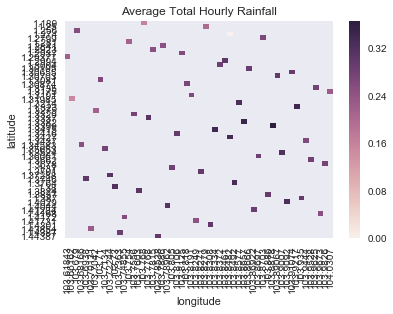

In [11]:
#Average total hourly rainfall by station across all hours (shows precipitation intensity)
ax=plt.axes()
sns.heatmap(average_lat,ax=ax)
ax.set_title("Average Total Hourly Rainfall")
plt.show()

In [12]:
nnon_zero = another_df[another_df["rainfall"]>0]
nnon_zero = nnon_zero.sort_values("timestamp_sgt",ascending=True).reset_index().set_index("timestamp_sgt",drop=False)
times = nnon_zero.index
nnon_zero = nnon_zero.set_index([times.year,times.month,times.day,times.hour])
nnon_zero.index.names = ["year","month","day","hour"]
#non_zero
number = nnon_zero.groupby(["year","month","day","hour"])["station_id"].nunique()
number=number[number==1]
one_station = list(number.index)
nnon_zero=nnon_zero.drop(one_station)
nnon_zero

station_id  rainfall       timestamp_sgt
year month day hour                                         
2016 12    3   1           S90       0.2 2016-12-03 01:04:59
               1           S07       0.8 2016-12-03 01:04:59
               1           S07       0.2 2016-12-03 01:09:59
               1           S71       0.2 2016-12-03 01:09:59
               1           S88       0.2 2016-12-03 01:14:59
               1           S07       1.0 2016-12-03 01:14:59
               1           S88       1.2 2016-12-03 01:19:59
               1           S79       0.4 2016-12-03 01:24:59
               1          S119       0.4 2016-12-03 01:24:59
               1          S118       1.2 2016-12-03 01:24:59
               1          S110       0.8 2016-12-03 01:24:59
               1           S55       0.2 2016-12-03 01:29:59
               1          S119       0.2 2016-12-03 01:29:59
               1          S118       0.6 2016-12-03 01:29:59
               1           S78       1.2 2016-12-03 01:29:59
               1          S110       0.8 2016-12-03 01:29:59
               1          S123       0.2 2016-12-03 01:29:59
               1           S07       0.2 2016-12-03 01:29:59
               1           S36       0.2 2016-12-03 01:29:59
               1          S123       0.2 2016-12-03 01:34:59
               1          S119       0.2 2016-12-03 01:34:59
               1           S55       0.4 2016-12-03 01:34:59
               1          S110       0.6 2016-12-03 01:34:59
               1           S78       1.8 2016-12-03 01:34:59
               1           S36       1.0 2016-12-03 01:34:59
               1           S43       2.0 2016-12-03 01:39:59
               1           S55       0.8 2016-12-03 01:39:59
               1           S78       0.2 2016-12-03 01:39:59
               1          S113       0.6 2016-12-03 01:39:59
               1           S61       0.6 2016-12-03 01:39:59
...                        ...       ...                 ...
2017 4     30  19         S100       3.2 2017-04-30 19:05:00
               19         S104       1.6 2017-04-30 19:05:00
               19          S66       4.8 2017-04-30 19:05:00
               19         S104       0.8 2017-04-30 19:10:00
               19         S112       1.8 2017-04-30 19:10:00
               19         S100       4.8 2017-04-30 19:10:00
               19          S66       4.4 2017-04-30 19:10:00
               19         S100       1.2 2017-04-30 19:15:00
               19          S66       3.0 2017-04-30 19:15:00
               19         S104       0.2 2017-04-30 19:15:00
               19         S112       2.6 2017-04-30 19:15:00
               19         S100       5.8 2017-04-30 19:20:00
               19          S66       2.4 2017-04-30 19:20:00
               19         S112       5.6 2017-04-30 19:20:00
               19          S66       3.8 2017-04-30 19:25:00
               19         S100       5.0 2017-04-30 19:25:00
               19         S112       4.2 2017-04-30 19:25:00
               19         S112       5.8 2017-04-30 19:30:00
               19         S100       3.4 2017-04-30 19:30:00
               19          S66       2.8 2017-04-30 19:30:00
               19         S112       5.6 2017-04-30 19:35:00
               19          S66       1.2 2017-04-30 19:35:00
               19         S100       0.4 2017-04-30 19:35:00
               19         S100       0.2 2017-04-30 19:40:00
               19         S112       3.6 2017-04-30 19:40:00
               19          S66       0.6 2017-04-30 19:40:00
               19         S112       2.0 2017-04-30 19:45:00
               19          S66       0.4 2017-04-30 19:45:00
               19         S112       1.4 2017-04-30 19:50:00
               19         S112       2.2 2017-04-30 19:55:00

[67369 rows x 3 columns]

In [13]:
indices = nnon_zero.index.unique().values

In [104]:
pairs=0
import itertools
for station in itertools.product(nnon_zero["station_id"],nnon_zero["station_id"]):
    #print(station)
    for index in indices:
        if (station in (nnon_zero.loc[index,"station_id"],nnon_zero.loc[index,"station_id"])).bool()==True:
            continue
        else:
            pass
        pairs+=1
print(pairs)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
pairs=0
total=0
for station1 in nnon_zero["station_id"]:
    how_many = nnon_zero["station_id"].value_counts()[station1]
    #print(how_many)
    for index in indices:
        if station1 in nnon_zero.loc[index,"station_id"]:
            for station2 in nnon_zero["station_id"]:
                while station2 != station1 & station2 in nnon_zero.loc[index,"station_id"]:
                    total+=1
                    if total == how_many:
                        pairs +=1
print(pairs)